#### Notebook Contents:
- Import Python Notebooks
- Use PRAW API to extract 1,000 posts from the USA and EUROPE subreddits
- Convert posts to DataFrame
- Prepare DataFrame to transfer to other Notebook

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

The below links were instrumental in the construction of this notebook.
- Towards Data Science: Scraping Reddit data    
    - https://towardsdatascience.com/scraping-reddit-data-1c0af3040768


- Introduction and Basics - Python Reddit API Wrapper (PRAW) Tutorial P.1
    - https://www.youtube.com/watch?v=NRgfgtzIhBQ

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#### Notebook Contents:
- Import Python Notebooks
- Import DataFrame from Data Extraction Jupyter Notebook
- Data Cleaning and Aggregation
- Modeling

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#### Imports

In [1]:
# API 
import praw

# Data Manipulation
import pandas as pd
import numpy as np

# Tokenization
from nltk.tokenize import RegexpTokenizer

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# DateTime
import time

# Web Scrapping, Text Cleaning
from bs4 import BeautifulSoup 

# Stop-Word list
from nltk.corpus import stopwords

# Detect Patterns in Text
import regex as re

# Instantiate stemmer.
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

# Train Test Split
from sklearn.model_selection import train_test_split

# Count Vectorizor
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Bayes
from sklearn.naive_bayes import MultinomialNB, GaussianNB

%matplotlib inline

In [2]:
# Set Pandas to view all rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

## Data Extraction

#### PRAW API Parameters Setup

In [3]:
# Using Reddit PRAW API to pull new stories
reddit = praw.Reddit(client_id = 'bwollOzqeTFAGw',
                     client_secret = "DvMUBxO8ZsMgLXYR7mW7uDWY6CE", 
                     password = 'scoober12',
                     user_agent = 'USERAGENT', 
                     username = 'DramaticPlate')

#### Web Scrapping

In [4]:
num_pulls = int(input())

200


In [5]:
# Prints the Post (Thread ID's)
USA_posts = []

USA = reddit.subreddit('USA')

# Sets Limit and Parameters for what data we want to pull in
for post in USA.new(limit = num_pulls):
    
    USA_posts.append([post.id, 
                  post.title, 
                  post.ups, 
                  post.downs, 
                  post.subreddit,
                  post.selftext,
                  post.url, 
                  post.num_comments, 
                  post.created])
    time.sleep(3)

# Countdown showing number of rows in model
    print(f'Number of "USA" Posts Obtained: {len(USA_posts)}')
    
# Converts Post content into DataFrame
USA_posts = pd.DataFrame(USA_posts, columns = ['ID', 
                                       'Title', 
                                       'Upvotes', 
                                       'Downvotes', 
                                       'Subreddit',
                                       'Body',
                                       'URL', 
                                       'Number of Comments', 
                                       'Date Created'])

Number of "USA" Posts Obtained: 1
Number of "USA" Posts Obtained: 2
Number of "USA" Posts Obtained: 3
Number of "USA" Posts Obtained: 4
Number of "USA" Posts Obtained: 5
Number of "USA" Posts Obtained: 6
Number of "USA" Posts Obtained: 7
Number of "USA" Posts Obtained: 8
Number of "USA" Posts Obtained: 9
Number of "USA" Posts Obtained: 10
Number of "USA" Posts Obtained: 11
Number of "USA" Posts Obtained: 12
Number of "USA" Posts Obtained: 13
Number of "USA" Posts Obtained: 14
Number of "USA" Posts Obtained: 15
Number of "USA" Posts Obtained: 16
Number of "USA" Posts Obtained: 17
Number of "USA" Posts Obtained: 18
Number of "USA" Posts Obtained: 19
Number of "USA" Posts Obtained: 20
Number of "USA" Posts Obtained: 21
Number of "USA" Posts Obtained: 22
Number of "USA" Posts Obtained: 23
Number of "USA" Posts Obtained: 24
Number of "USA" Posts Obtained: 25
Number of "USA" Posts Obtained: 26
Number of "USA" Posts Obtained: 27
Number of "USA" Posts Obtained: 28
Number of "USA" Posts Obtaine

In [6]:
# Prints the Post (Thread ID's)
EUROPE_posts = []

EUROPE = reddit.subreddit('EUROPE')

# Sets Limit and Parameters for what data we want to pull in
for post in EUROPE.new(limit = num_pulls):
    
    EUROPE_posts.append([post.id, 
                  post.title, 
                  post.ups, 
                  post.downs, 
                  post.subreddit,
                  post.selftext,
                  post.url, 
                  post.num_comments, 
                  post.created])
    time.sleep(3)

# Countdown showing number of rows in model
    print(f'Number of EUROPE Posts Obtained: {len(EUROPE_posts)}')
    
# Converts Post content into DataFrame
EUROPE_posts = pd.DataFrame(EUROPE_posts, columns = ['ID', 
                                       'Title', 
                                       'Upvotes', 
                                       'Downvotes', 
                                       'Subreddit',
                                       'Body',
                                       'URL', 
                                       'Number of Comments', 
                                       'Date Created'])

Number of EUROPE Posts Obtained: 1
Number of EUROPE Posts Obtained: 2
Number of EUROPE Posts Obtained: 3
Number of EUROPE Posts Obtained: 4
Number of EUROPE Posts Obtained: 5
Number of EUROPE Posts Obtained: 6
Number of EUROPE Posts Obtained: 7
Number of EUROPE Posts Obtained: 8
Number of EUROPE Posts Obtained: 9
Number of EUROPE Posts Obtained: 10
Number of EUROPE Posts Obtained: 11
Number of EUROPE Posts Obtained: 12
Number of EUROPE Posts Obtained: 13
Number of EUROPE Posts Obtained: 14
Number of EUROPE Posts Obtained: 15
Number of EUROPE Posts Obtained: 16
Number of EUROPE Posts Obtained: 17
Number of EUROPE Posts Obtained: 18
Number of EUROPE Posts Obtained: 19
Number of EUROPE Posts Obtained: 20
Number of EUROPE Posts Obtained: 21
Number of EUROPE Posts Obtained: 22
Number of EUROPE Posts Obtained: 23
Number of EUROPE Posts Obtained: 24
Number of EUROPE Posts Obtained: 25
Number of EUROPE Posts Obtained: 26
Number of EUROPE Posts Obtained: 27
Number of EUROPE Posts Obtained: 28
N

------------------

#### Data Extraction to CSV Conversion

In [80]:
# Convert Reddit Post Extractions to CSV Format
USA_posts.to_csv('/Users/christianbarker/Desktop/GitHub/Natural_Language_Processing_Reddit_Posts/USA_Reddit_Posts')
EUROPE_posts.to_csv('/Users/christianbarker/Desktop/GitHub/Natural_Language_Processing_Reddit_Posts/EUROPE_Reddit_Posts')

------------------------

#### Create Master DataFrame

In [7]:
# Creating master DataFrame by combining both subreddit DataFrames
master = pd.concat([USA_posts, EUROPE_posts], axis = 0)

In [8]:
# Resetting index for concatenated master
master = master.reset_index(drop = True)
master.head()

,ID,Title,Upvotes,Downvotes,Subreddit,Body,URL,Number of Comments,Date Created
0,erdpd2,Why did the staff walk out at Savannah’s in Tr...,2,0,usa,Why did they do that ? https://www.freep.com/...,https://www.reddit.com/r/usa/comments/erdpd2/w...,1,1.579558e+09
1,eracv1,The Hypothetical Future States of America!,2,0,usa,,https://i.redd.it/rnc7hrc36wb41.png,1,1.579537e+09
2,er7vpa,DRIVING ACROSS THE USA!!! (3 DAYS!) | VLOG #50,0,0,usa,,https://www.youtube.com/watch?v=zeOR9-t_qW0&t=24s,0,1.579523e+09
3,er7g19,Two worlds,32,0,usa,,https://i.redd.it/cwwfms86uub41.gif,4,1.579520e+09
4,er55bl,SMART CITY,5,0,usa,,https://youtu.be/FepUDdIl31E,0,1.579509e+09


In [9]:
# Checking to make sure all entries are unique
print(f'Number of Unique: {len(master["Title"].unique())}')
print(f'Number of Total Posts: {len(master["Title"])}')

Number of Unique: 398
Number of Total Posts: 400


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

## Data Cleaning and Basic Inspection

#### Basic Checks

In [10]:
# Convert column from Unix time to DateTime
master['Date Created'] = pd.to_datetime(master['Date Created'], unit = 's')

In [11]:
# Checking for Null Values
master.isnull().sum()

ID                    0
Title                 0
Upvotes               0
Downvotes             0
Subreddit             0
Body                  0
URL                   0
Number of Comments    0
Date Created          0
dtype: int64

In [12]:
# Verifying that Column Types are correct
master.dtypes

ID                            object
Title                         object
Upvotes                        int64
Downvotes                      int64
Subreddit                     object
Body                          object
URL                           object
Number of Comments             int64
Date Created          datetime64[ns]
dtype: object

#### Text Cleaning

In [13]:
def text_cleaning(text):
    # Function to convert text to a string of words
    # The input is a single string (ie. Body of reddit post), and the output is a single string
    
    # 1. Remove HTML.
    review_text = BeautifulSoup(text, 'lxml').get_text()
    
    # 2. Remove non-letters.
    letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    
    # 3. Convert to lower case, split into individual words.
    words = letters_only.lower().split()
    
    # 4. In Python, searching a set is much faster than searching
    # a list, so convert the stop words to a set.
    stops = set(stopwords.words('english'))
    
    # 5. Remove stop words.
    meaningful_words = [w for w in words if not w in stops]
    
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return(" ".join(meaningful_words))

In [14]:
# Get the number of reviews based on the dataframe size.
total_posts = master.shape[0]
print(f'There are {total_posts} posts.')

# Initialize an empty list to hold the clean reviews.
clean_title_posts = []
clean_body_posts = []

There are 400 posts.


In [15]:
# Converts everything in master['Title'] into a cleaned version of the text

print("Cleaning Titles of reddit posts...")

t = 0

for title in master['Title']:
    # Convert title to words, then append to clean_title_posts.
    clean_title_posts.append(text_cleaning(title))
    
    # If the index is divisible by 100, print a message
    if (t + 1) % 100 == 0:
        print(f'Review {t + 1} of {total_posts}.')
    
    t += 1

# Converts everything in master['Body'] into a cleaned version of the text

print("Cleaning Body of reddit posts...")

b = 0

for body in master['Body']:
    # Convert review to words, then append to clean_body_posts.
    clean_body_posts.append(text_cleaning(body))

    # If the index is divisible by 100, print a message
    if (b + 1) % 100 == 0:
        print(f'Review {b + 1} of {total_posts}.')
    
    b += 1

Cleaning Titles of reddit posts...
Review 100 of 400.
Review 200 of 400.
Review 300 of 400.
Review 400 of 400.
Cleaning Body of reddit posts...
Review 100 of 400.
Review 200 of 400.
Review 300 of 400.
Review 400 of 400.


/Users/christianbarker/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "https://loudwire.com/rush-neil-peart-dead-67/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/Users/christianbarker/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:219: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


-------------------

#### DataFrame Aggregation

In [16]:
master.head()

,ID,Title,Upvotes,Downvotes,Subreddit,Body,URL,Number of Comments,Date Created
0,erdpd2,Why did the staff walk out at Savannah’s in Tr...,2,0,usa,Why did they do that ? https://www.freep.com/...,https://www.reddit.com/r/usa/comments/erdpd2/w...,1,2020-01-20 22:14:07
1,eracv1,The Hypothetical Future States of America!,2,0,usa,,https://i.redd.it/rnc7hrc36wb41.png,1,2020-01-20 16:10:24
2,er7vpa,DRIVING ACROSS THE USA!!! (3 DAYS!) | VLOG #50,0,0,usa,,https://www.youtube.com/watch?v=zeOR9-t_qW0&t=24s,0,2020-01-20 12:16:20
3,er7g19,Two worlds,32,0,usa,,https://i.redd.it/cwwfms86uub41.gif,4,2020-01-20 11:41:22
4,er55bl,SMART CITY,5,0,usa,,https://youtu.be/FepUDdIl31E,0,2020-01-20 08:34:40


In [17]:
# Converting cleaned posts into DataFrame
clean_title_posts_df = pd.DataFrame(clean_title_posts)
clean_body_posts_df = pd.DataFrame(clean_body_posts)

# Assigning Column Names
clean_title_posts_df.columns = ['Title Cleaned Text']
clean_body_posts_df.columns = ['Body Cleaned Text']

# Combining cleaned posts DataFrames with master DataFrame
master = pd.concat([master, clean_title_posts_df, clean_body_posts_df], axis = 1)

In [18]:
master['Aggregate Cleaned Text'] = master['Title Cleaned Text'] + ' ' + master['Body Cleaned Text']

In [19]:
# Creating a new column where Subreddit strings are replaced by 1's and 0's
master['Subreddit Code'] = master['Subreddit'].apply(lambda x: 1 if x == 'USA' else 0)

In [20]:
master.head(2)

,ID,Title,Upvotes,Downvotes,Subreddit,Body,URL,Number of Comments,Date Created,Title Cleaned Text,Body Cleaned Text,Aggregate Cleaned Text,Subreddit Code
0,erdpd2,Why did the staff walk out at Savannah’s in Tr...,2,0,usa,Why did they do that ? https://www.freep.com/...,https://www.reddit.com/r/usa/comments/erdpd2/w...,1,2020-01-20 22:14:07,staff walk savannah trenton mi forcing close w...,https www freep com story entertainment dining...,staff walk savannah trenton mi forcing close w...,1
1,eracv1,The Hypothetical Future States of America!,2,0,usa,,https://i.redd.it/rnc7hrc36wb41.png,1,2020-01-20 16:10:24,hypothetical future states america,,hypothetical future states america,1


#### Stemming

In [21]:
ps = PorterStemmer()

master['Title Cleaned Text'] = [ps.stem(w) for w in master['Title Cleaned Text']]
master['Body Cleaned Text'] = [ps.stem(w) for w in master['Body Cleaned Text']]
master['Aggregate Cleaned Text'] = [ps.stem(w) for w in master['Aggregate Cleaned Text']]

#### Lemmatizing

In [22]:
lemmatizer = WordNetLemmatizer()

master['Title Cleaned Text'] = [lemmatizer.lemmatize(w) for w in master['Title Cleaned Text']]
master['Body Cleaned Text'] = [lemmatizer.lemmatize(w) for w in master['Body Cleaned Text']]
master['Aggregate Cleaned Text'] = [lemmatizer.lemmatize(w) for w in master['Aggregate Cleaned Text']]

In [23]:
master.head(2)

,ID,Title,Upvotes,Downvotes,Subreddit,Body,URL,Number of Comments,Date Created,Title Cleaned Text,Body Cleaned Text,Aggregate Cleaned Text,Subreddit Code
0,erdpd2,Why did the staff walk out at Savannah’s in Tr...,2,0,usa,Why did they do that ? https://www.freep.com/...,https://www.reddit.com/r/usa/comments/erdpd2/w...,1,2020-01-20 22:14:07,staff walk savannah trenton mi forcing close w...,https www freep com story entertainment dining...,staff walk savannah trenton mi forcing close w...,1
1,eracv1,The Hypothetical Future States of America!,2,0,usa,,https://i.redd.it/rnc7hrc36wb41.png,1,2020-01-20 16:10:24,hypothetical future states america,,hypothetical future states america,1


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

## Modeling

#### Train Test Split

In [24]:
X = master['Aggregate Cleaned Text']
y = master['Subreddit Code']

In [25]:
# Create train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    random_state = 4)

#### Baseline Accuracy

In [26]:
# Baseline Accuracy
baseline = y_test.value_counts(normalize = True)
baseline = pd.DataFrame(baseline.round(2))
baseline = baseline.T
baseline.columns = 'USA', 'EUROPE'
baseline.rename(index = {'Subreddit Code' : 'Baseline Accuracy'}, inplace = True)
baseline = baseline.T

baseline

,Baseline Accuracy
USA,0.53
EUROPE,0.47


#### CountVectorizer

In [27]:
# Fit the transformer
cvec = CountVectorizer()

# Fit X
X_train_cvec = cvec.fit_transform(X_train)
X_test_cvec = cvec.transform(X_test)

In [28]:
# Convert to DataFrame (Visualization)
X_train_cvec_df = pd.DataFrame(X_train_cvec.toarray(),
                          columns = cvec.get_feature_names())
X_train_cvec_df.head()

,abandoned,abandons,abc,abortion,absurd,abuse,accounting,accused,achieved,acitivities,across,act,activities,actually,admit,advance,adventure,advice,advisable,aed,afford,africa,ag,age,agent,aggressive,ago,agree,ahead,aid,air,airline,airports,al,albertina,ali,alien,alive,allegations,allegedly,allowed,allowing,alpine,already,alright,also,alternatives,always,amazon,america,american,americaneedsyang,americans,americas,amongst,anaheim,anarchist,andrew,angeles,animation,anne,anniversary,anti,antonio,anybody,anyone,anything,anyway,anywhere,apartment,apk,appear,apple,applications,appraisals,appreciated,approach,appropriation,approval,approves,april,area,areas,arguments,arizona,arms,army,around,arrest,arrested,arrived,art,article,asen,asia,ask,asked,asking,asks,associated,assume,assumed,astonishing,asylum,athens,atl,attack,attempt,auschwitz,austin,australia,austria,auto,average,aversion,avoid,aware,away,bachelor,back,backpacker,badmon,bae,baghdad,ban,band,banderas,barbed,barrier,based,basic,battle,bbe,bbf,beat,beating,beautiful,bedroom,beefed,beep,beeps,beginners,begins,behaviour,behind,belgian,belgrade,believe,believes,ben,berlin,besides,best,better,beyond,bezos,big,bil,bill,billion,billionaires,bills,biometrics,bit,blanket,blasket,blasts,bless,blocking,blocks,bmw,bn,bodies,bomb,bong,book,bordeaux,border,born,bosiljevo,bother,branding,brazil,breaches,break,breaking,breaks,brexit,bribery,bring,brit,britians,british,britons,brought,brussels,bucharest,budapest,bulgaria,bunch,burning,burnt,bush,bushfire,butterfly,buttigieg,cala,california,call,called,calling,calls,caloric,camps,canadian,candidacy,cannot,capita,captain,car,care,case,cases,castle,casually,catalan,catholic,cause,ce,ceasefire,celebrate,censorship,center,central,century,ceo,ces,ch,chads,chairman,chambers,chances,change,charge,charges,charging,charlotte,cheap,check,checked,...,sweden,swedish,swidnica,switzerland,symbol,system,tak,take,taken,taking,talent,talking,tastic,tax,taxpayers,team,tech,teddy,teeth,tell,temperature,tensions,term,terms,territory,tesla,testing,texas,th,thank,thanks,theatre,thing,things,think,thinks,third,thought,thousand,thrashes,threatens,three,threesomes,ticket,ties,til,tim,time,times,title,today,together,told,tom,tomhanks,tonight,took,top,topics,tornados,torture,tortured,tough,tour,town,trade,train,training,trains,transylvania,travel,traveling,travelling,trees,trends,trenton,trial,tricking,tried,trillion,trip,trips,troops,trouble,true,trump,trust,truth,try,trying,tryzub,turkey,turkish,turn,turned,tutorial,tv,two,uk,ukraine,ukrainian,unable,unaffected,unexpected,unexplained,unfolded,unfortunate,unit,united,unitedhealth,units,universities,unless,unlike,unpopular,unveil,upper,us,usa,usage,usd,use,used,uses,using,uss,ussr,utility,vacation,valley,valsot,valued,veg,veganuary,vegas,venice,venus,veto,via,viable,video,vienna,viet,view,vince,vinschgau,violating,violence,virgin,virginia,visa,visas,visit,visiting,visits,vlog,void,volkswagens,volpe,von,vows,vralx,vs,waging,wait,waiting,walgreens,walk,walking,walkout,wall,walls,want,wanted,wants,war,wardrobe,warns,warranted,wars,warship,washington,washingtonpost,watch,water,watercolor,waters,way,wb,web,webp,week,weeks,well,werent,west,whatever,whatnot,wheel,whether,white,wholly,width,wife,wild,wildlife,wilkerson,win,wing,winning,winter,wiped,wire,wispd,without,women,wondered,wondering,words,work,workers,working,workplace,works,world,worlds,worried,worrying,worth,would,wp,wrong,wrongly,ww,www,xkt,xom,xpress,yal,yall,yang,year,yearly,years,york,youtube,zero,zone,zurich,zwolle
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

#### CountVectorizer - Logistic Regression

In [29]:
# Instantiate logistic regression.
lr = LogisticRegression()

# Fit logistic regression.
lr.fit(X_train_cvec, y_train)

# Evaluate logistic regression.
print(f'Training Score: {lr.score(X_train_cvec, y_train).round(2)}')
print(f'Testing Score: {lr.score(X_test_cvec, y_test).round(2)}')

Training Score: 1.0
Testing Score: 0.81


In [30]:
# Create DataFrame showing scores for each methodology (for aggregating viewing at end)
cvec_lr_scores_df = pd.DataFrame([lr.score(X_train_cvec, y_train).round(2), lr.score(X_test_cvec, y_test).round(2)]).T
cvec_lr_scores_df.columns = 'Training Data', 'Testing Data'
cvec_lr_scores_df.rename(index = {0 : 'CVEC Logistic Regression'}, inplace = True)

cvec_lr_scores_df

,Training Data,Testing Data
CVEC Logistic Regression,1.0,0.81


#### CountVectorizor - Logistic Regression - Predict Probability

In [31]:
# Create DataFrame showing certainty of individual posts
predict_lr_cvec_df = pd.DataFrame(lr.predict_proba(X_train_cvec).round(2))
predict_lr_cvec_df.columns = 'EUROPE', 'USA'
predict_lr_cvec_df.sort_values(by = 'EUROPE', ascending = True)
predict_lr_cvec_df = pd.concat([master['Title'],predict_lr_cvec_df], axis = 1)
predict_lr_cvec_df = predict_lr_cvec_df.dropna()

#### CountVectorizer - Bayes Classifier

In [32]:
# Instantiates and Fits Naive Bayes 
mnb = MultinomialNB()

mnb.fit(X_train_cvec, y_train)
print(f'Training Score: {mnb.score(X_train_cvec, y_train).round(2)}')
print(f'Testing Score: {mnb.score(X_test_cvec, y_test).round(2)}')

Training Score: 0.99
Testing Score: 0.85


In [33]:
# Create DataFrame showing scores for each methodology (for aggregating viewing at end)
cvec_mnb_scores_df = pd.DataFrame([mnb.score(X_train_cvec, y_train).round(2), mnb.score(X_test_cvec, y_test).round(2)]).T
cvec_mnb_scores_df.columns = 'Training Data', 'Testing Data'
cvec_mnb_scores_df.rename(index = {0 : 'CVEC Naive Bayes'}, inplace = True)

cvec_mnb_scores_df

,Training Data,Testing Data
CVEC Naive Bayes,0.99,0.85


#### CountVectorizor - Naive Bayes - Predict Probability

In [34]:
# Create DataFrame showing certainty of individual posts
predict_mnb_cvec_df = pd.DataFrame(mnb.predict_proba(X_train_cvec).round(2))
predict_mnb_cvec_df.columns = 'EUROPE', 'USA'
predict_mnb_cvec_df.sort_values(by = 'EUROPE', ascending = True)

,EUROPE,USA
149,0.00,1.00
177,0.00,1.00
176,0.00,1.00
169,0.00,1.00
167,0.00,1.00
166,0.00,1.00
163,0.00,1.00
158,0.00,1.00
154,0.00,1.00
153,0.00,1.00


#### CountVectorizer - Exploratory Data Analysis

In [35]:
# Cell creates a DataFrame that shows words and their Coefficeints
lr_df = pd.DataFrame(lr.coef_.round(2))
lr_df = lr_df.T

X_train_cvec_columns_df = pd.DataFrame(list(X_train_cvec_df.columns.values))

X_train_cvec_columns_df = pd.concat([X_train_cvec_columns_df, lr_df], axis = 1)
X_train_cvec_columns_df.columns = 'Word', 'Coef'
X_train_cvec_columns_df.sort_values(by = 'Coef', ascending = True)

,Word,Coef
512,eu,-1.41
515,europe,-1.03
651,germany,-1.00
1204,poland,-0.76
838,italy,-0.75
...,...,...
1543,stock,0.98
669,good,1.00
1700,usa,1.06
1667,trump,1.18


#### CountVectorizor Quick Correlation Access Tool

In [36]:
# Identify correlations of specific words
X_train_cvec_columns_df.loc[X_train_cvec_columns_df['Word'] == 'trump'].round(2)

,Word,Coef
1667,trump,1.18


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

#### TfidVectorizer

In [37]:
# Fit the transformer
tvec = TfidfVectorizer()

# Fit X
X_train_tvec = tvec.fit_transform(X_train)
X_test_tvec = tvec.transform(X_test)

In [38]:
# Convert to DataFrame (Visualization)
X_train_tvec_df = pd.DataFrame(X_train_tvec.toarray(),
                          columns = tvec.get_feature_names())
X_train_tvec_df.head()

,abandoned,abandons,abc,abortion,absurd,abuse,accounting,accused,achieved,acitivities,across,act,activities,actually,admit,advance,adventure,advice,advisable,aed,afford,africa,ag,age,agent,aggressive,ago,agree,ahead,aid,air,airline,airports,al,albertina,ali,alien,alive,allegations,allegedly,allowed,allowing,alpine,already,alright,also,alternatives,always,amazon,america,american,americaneedsyang,americans,americas,amongst,anaheim,anarchist,andrew,angeles,animation,anne,anniversary,anti,antonio,anybody,anyone,anything,anyway,anywhere,apartment,apk,appear,apple,applications,appraisals,appreciated,approach,appropriation,approval,approves,april,area,areas,arguments,arizona,arms,army,around,arrest,arrested,arrived,art,article,asen,asia,ask,asked,asking,asks,associated,assume,assumed,astonishing,asylum,athens,atl,attack,attempt,auschwitz,austin,australia,austria,auto,average,aversion,avoid,aware,away,bachelor,back,backpacker,badmon,bae,baghdad,ban,band,banderas,barbed,barrier,based,basic,battle,bbe,bbf,beat,beating,beautiful,bedroom,beefed,beep,beeps,beginners,begins,behaviour,behind,belgian,belgrade,believe,believes,ben,berlin,besides,best,better,beyond,bezos,big,bil,bill,billion,billionaires,bills,biometrics,bit,blanket,blasket,blasts,bless,blocking,blocks,bmw,bn,bodies,bomb,bong,book,bordeaux,border,born,bosiljevo,bother,branding,brazil,breaches,break,breaking,breaks,brexit,bribery,bring,brit,britians,british,britons,brought,brussels,bucharest,budapest,bulgaria,bunch,burning,burnt,bush,bushfire,butterfly,buttigieg,cala,california,call,called,calling,calls,caloric,camps,canadian,candidacy,cannot,capita,captain,car,care,case,cases,castle,casually,catalan,catholic,cause,ce,ceasefire,celebrate,censorship,center,central,century,ceo,ces,ch,chads,chairman,chambers,chances,change,charge,charges,charging,charlotte,cheap,check,checked,...,sweden,swedish,swidnica,switzerland,symbol,system,tak,take,taken,taking,talent,talking,tastic,tax,taxpayers,team,tech,teddy,teeth,tell,temperature,tensions,term,terms,territory,tesla,testing,texas,th,thank,thanks,theatre,thing,things,think,thinks,third,thought,thousand,thrashes,threatens,three,threesomes,ticket,ties,til,tim,time,times,title,today,together,told,tom,tomhanks,tonight,took,top,topics,tornados,torture,tortured,tough,tour,town,trade,train,training,trains,transylvania,travel,traveling,travelling,trees,trends,trenton,trial,tricking,tried,trillion,trip,trips,troops,trouble,true,trump,trust,truth,try,trying,tryzub,turkey,turkish,turn,turned,tutorial,tv,two,uk,ukraine,ukrainian,unable,unaffected,unexpected,unexplained,unfolded,unfortunate,unit,united,unitedhealth,units,universities,unless,unlike,unpopular,unveil,upper,us,usa,usage,usd,use,used,uses,using,uss,ussr,utility,vacation,valley,valsot,valued,veg,veganuary,vegas,venice,venus,veto,via,viable,video,vienna,viet,view,vince,vinschgau,violating,violence,virgin,virginia,visa,visas,visit,visiting,visits,vlog,void,volkswagens,volpe,von,vows,vralx,vs,waging,wait,waiting,walgreens,walk,walking,walkout,wall,walls,want,wanted,wants,war,wardrobe,warns,warranted,wars,warship,washington,washingtonpost,watch,water,watercolor,waters,way,wb,web,webp,week,weeks,well,werent,west,whatever,whatnot,wheel,whether,white,wholly,width,wife,wild,wildlife,wilkerson,win,wing,winning,winter,wiped,wire,wispd,without,women,wondered,wondering,words,work,workers,working,workplace,works,world,worlds,worried,worrying,worth,would,wp,wrong,wrongly,ww,www,xkt,xom,xpress,yal,yall,yang,year,yearly,years,york,youtube,zero,zone,zurich,zwolle
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.39293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [39]:
# Instantiate logistic regression.
lr = LogisticRegression()

# Fit logistic regression.
lr.fit(X_train_tvec, y_train)

# Evaluate logistic regression.
print(f'Training Score: {lr.score(X_train_tvec, y_train)}')
print(f'Testing Score: {lr.score(X_test_tvec, y_test)}')

Training Score: 0.9933333333333333
Testing Score: 0.82


In [40]:
# Create DataFrame showing scores for each methodology (for aggregating viewing at end)
tvec_lr_scores_df = pd.DataFrame([lr.score(X_train_tvec, y_train).round(2), lr.score(X_test_tvec, y_test).round(2)]).T
tvec_lr_scores_df.columns = 'Training Data', 'Testing Data'
tvec_lr_scores_df.rename(index = {0 : 'TVEC Logistic Regression'}, inplace = True)

tvec_lr_scores_df

,Training Data,Testing Data
TVEC Logistic Regression,0.99,0.82


#### TdifVectorizor - Logistic Regression - Predict Probability

In [41]:
# Create DataFrame showing certainty of individual posts
predict_lr_tvec_df = pd.DataFrame(lr.predict_proba(X_train_tvec).round(2))
predict_lr_tvec_df.columns = 'EUROPE', 'USA'
predict_lr_tvec_df.sort_values(by = 'EUROPE', ascending = True)

,EUROPE,USA
289,0.27,0.73
39,0.28,0.72
144,0.30,0.70
146,0.30,0.70
204,0.30,0.70
116,0.31,0.69
124,0.31,0.69
154,0.31,0.69
60,0.31,0.69
217,0.31,0.69


#### TdifVectorizer - Bayes Classifier

In [81]:
# Transforms data, Instantiates and Fits Naive Bayes 
X_train_gnb_tvec = tvec.transform(X_train).todense()
X_test_gnb_tvec = tvec.transform(X_test).todense()

gnb = GaussianNB()

gnb.fit(X_train_gnb_tvec, y_train)
gnb.score(X_train_gnb_tvec, y_train).round(2), gnb.score(X_test_gnb_tvec, y_test).round(2)

(0.99, 0.69)

In [83]:
# Create DataFrame showing scores for each methodology (for aggregating viewing at end)
tvec_gnb_scores_df = pd.DataFrame([gnb.score(X_train_gnb_tvec, y_train).round(2), gnb.score(X_test_gnb_tvec, y_test).round(2)]).T
tvec_gnb_scores_df.columns = 'Training Data', 'Testing Data'
tvec_gnb_scores_df.rename(index = {0 : 'TVEC Naive Bayes'}, inplace = True)

tvec_gnb_scores_df

,Training Data,Testing Data
TVEC Naive Bayes,0.99,0.69


#### TdifVectorizor - Naive Bayes - Predict Probability¶

In [44]:
# Create DataFrame showing certainty of individual posts
predict_gnb_tvec_df = pd.DataFrame(gnb.predict_proba(X_train_gnb_tvec).round(2))
predict_gnb_tvec_df.columns = 'EUROPE', 'USA'
predict_gnb_tvec_df.sort_values(by = 'EUROPE', ascending = True)

,EUROPE,USA
0,0.0,1.0
163,0.0,1.0
164,0.0,1.0
165,0.0,1.0
166,0.0,1.0
167,0.0,1.0
168,0.0,1.0
169,0.0,1.0
174,0.0,1.0
176,0.0,1.0


#### TdifVectorizer - Exploratory Data Analysis

In [45]:
# Cell creates a DataFrame that shows words and their Coefficeints
lr_df = pd.DataFrame(lr.coef_.round(2))
lr_df = lr_df.T

X_train_tvec_columns_df = pd.DataFrame(list(X_train_tvec_df.columns.values))

X_train_tvec_columns_df = pd.concat([X_train_tvec_columns_df, lr_df], axis = 1)
X_train_tvec_columns_df.columns = 'Word', 'Coef'
X_train_tvec_columns_df.sort_values(by = 'Coef', ascending = True)

,Word,Coef
512,eu,-1.33
651,germany,-0.88
515,europe,-0.69
838,italy,-0.65
1204,poland,-0.64
...,...,...
669,good,0.90
1700,usa,1.00
1667,trump,1.05
49,america,1.11


#### Pipelining - CVEC - Logistic Regression

In [46]:
# Set up with two stages:
# 1. An instance of CountVectorizer (transformer)
# 2. A LogisticRegression instance (estimator)

pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('lr', LogisticRegression())
])

In [47]:
# Search over the following values of hyperparameters:
# Maximum number of features fit: 2500, 3000, 3500
# Minimum number of documents needed to include token: 2, 3
# Maximum number of documents needed to include token: 90%, 95%
# Check (individual tokens) and also check (individual tokens and bigrams).

pipe_params = {
    'cvec__max_features': [2000, 4000, 5000],
#     'cvec__min_df': [0.0, 0.5],
#     'cvec__max_df': [0.5, 1.0],
    'cvec__ngram_range': [(1,1), (1,2)]
}

In [48]:
# Instantiate GridSearchCV.
gs = GridSearchCV(pipe,                       # Object being Optimized
                  param_grid = pipe_params,   # Parameters values being searched
                  cv = 3)                     # 3-fold cross-validation

In [49]:
# Fit GridSearch to training data.
gs.fit(X_train, y_train);

In [50]:
# What's the best score?
print(f'Best Score: {gs.best_score_.round(2)}')

Best Score: 0.79


In [51]:
# Save best model as gs_model.
gs_model = gs.best_estimator_

In [52]:
# Score model on training set.
print(f'Training Score: {gs_model.score(X_train, y_train).round(2)}')

# Score model on testing set.
print(f'Testing Score: {gs_model.score(X_test, y_test).round(2)}')

Training Score: 0.99
Testing Score: 0.81


In [53]:
# Create DataFrame showing scores for each methodology (for aggregating viewing at end)
cvec_lr_pipe_scores_df = pd.DataFrame([gs_model.score(X_train, y_train).round(2), gs_model.score(X_test, y_test).round(2)]).T
cvec_lr_pipe_scores_df.columns = 'Training Data', 'Testing Data'
cvec_lr_pipe_scores_df.rename(index = {0 : 'CVEC Logistic Regression Pipeline'}, inplace = True)

cvec_lr_pipe_scores_df

,Training Data,Testing Data
CVEC Logistic Regression Pipeline,0.99,0.81


#### Pipelineing - CVEC - Naive Bayes

In [54]:
# Set up with two stages:
# 1. An instance of CountVectorizer (transformer)
# 2. A LogisticRegression instance (estimator)

pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('mnb', MultinomialNB())
])

In [55]:
# Search over the following values of hyperparameters:
# Maximum number of features fit: 2500, 3000, 3500
# Minimum number of documents needed to include token: 2, 3
# Maximum number of documents needed to include token: 90%, 95%
# Check (individual tokens) and also check (individual tokens and bigrams).

pipe_params = {
    'cvec__max_features': [2500, 3000, 3500],
    'cvec__min_df': [0, 1],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1), (1,2)]
}

In [56]:
# Instantiate GridSearchCV.
gs = GridSearchCV(pipe,                       # Object being Optimized
                  param_grid = pipe_params,   # Parameters values being searched
                  cv = 3)                     # 3-fold cross-validation

In [57]:
# Fit GridSearch to training data.
gs.fit(X_train, y_train);

In [58]:
# What's the best score?
print(f'Best Score: {gs.best_score_.round(2)}')

Best Score: 0.79


In [59]:
# Save best model as gs_model.
gs_model = gs.best_estimator_

In [60]:
# Score model on training set.
print(f'Training Score: {gs_model.score(X_train, y_train).round(2)}')

# Score model on testing set.
print(f'Testing Score: {gs_model.score(X_test, y_test).round(2)}')

Training Score: 0.99
Testing Score: 0.85


In [61]:
# Create DataFrame showing scores for each methodology (for aggregating viewing at end)
cvec_mnb_pipe_scores_df = pd.DataFrame([gs_model.score(X_train, y_train).round(2), gs_model.score(X_test, y_test).round(2)]).T
cvec_mnb_pipe_scores_df.columns = 'Training Data', 'Testing Data'
cvec_mnb_pipe_scores_df.rename(index = {0 : 'CVEC Naive Bayes Pipeline'}, inplace = True)

cvec_mnb_pipe_scores_df

,Training Data,Testing Data
CVEC Naive Bayes Pipeline,0.99,0.85


#### Pipelining - TVEC - Logistic Regression

In [62]:
# Set up with two stages:
# 1. An instance of TfidfVectorizer (transformer)
# 2. A LogisticRegression instance (estimator)

pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('lr', LogisticRegression())
])

In [63]:
# Search over the following values of hyperparameters:
# Maximum number of features fit: 2500, 3000, 3500
# Minimum number of documents needed to include token: 2, 3
# Maximum number of documents needed to include token: 90%, 95%
# Check (individual tokens) and also check (individual tokens and bigrams).

pipe_params = {
    'tvec__max_features': [2500, 3000, 3500],
    'tvec__min_df': [0, 1],
    'tvec__max_df': [.9, .95],
    'tvec__ngram_range': [(1,1), (1,2)]
}

In [64]:
# Instantiate GridSearchCV.
gs = GridSearchCV(pipe,                       # Object being Optimized
                  param_grid = pipe_params,   # Parameters values being searched
                  cv = 3)                     # 3-fold cross-validation

In [65]:
# Fit GridSearch to training data.
gs.fit(X_train, y_train);

In [66]:
# What's the best score?
print(f'Best Score: {gs.best_score_.round(2)}')

Best Score: 0.78


In [67]:
# Save best model as gs_model.
gs_model = gs.best_estimator_

In [68]:
# Score model on training set.
print(f'Training Score: {gs_model.score(X_train, y_train).round(2)}')

# Score model on testing set.
print(f'Testing Score: {gs_model.score(X_test, y_test).round(2)}')

Training Score: 0.99
Testing Score: 0.8


In [69]:
# Create DataFrame showing scores for each methodology (for aggregating viewing at end)
tvec_lr_pipe_scores_df = pd.DataFrame([gs_model.score(X_train, y_train).round(2), gs_model.score(X_test, y_test).round(2)]).T
tvec_lr_pipe_scores_df.columns = 'Training Data', 'Testing Data'
tvec_lr_pipe_scores_df.rename(index = {0 : 'TVEC Logistic Regression Pipeline'}, inplace = True)

tvec_lr_pipe_scores_df

,Training Data,Testing Data
TVEC Logistic Regression Pipeline,0.99,0.8


#### Viewing Scores

In [70]:
display(len(master.loc[master['Subreddit'] == 'EUROPE']))
display(len(master.loc[master['Subreddit'] == 'USA']))

200

200

In [71]:
# Aggregates all scores for easy viewing

# Baseline
display(baseline)

# Linear Regression
master_lr_scores_df = pd.concat([cvec_lr_scores_df.round(2), 
                              tvec_lr_scores_df.round(2), 
                              cvec_lr_pipe_scores_df.round(2), 
                              tvec_lr_pipe_scores_df.round(2),
                              cvec_mnb_scores_df.round(2),
                              tvec_gnb_scores_df.round(2),
                              cvec_mnb_pipe_scores_df.round(2)], 
                              axis = 0)

master_lr_scores_df['Delta'] = master_lr_scores_df['Training Data'] - master_lr_scores_df['Testing Data']
display(master_lr_scores_df.sort_values(by = 'Delta', ascending = True))

# Naive Bayes
master_nb_scores_df = pd.concat([cvec_mnb_scores_df.round(2), 
                              tvec_gnb_scores_df.round(2), 
                              cvec_mnb_pipe_scores_df.round(2)], 
#                               tvec_gnb_pipe_scores_df.round(2)], 
                              axis = 0)

master_nb_scores_df['Delta'] = master_nb_scores_df['Training Data'] - master_nb_scores_df['Testing Data']
display(master_nb_scores_df.sort_values(by = 'Delta', ascending = True))

,Baseline Accuracy
USA,0.53
EUROPE,0.47


,Training Data,Testing Data,Delta
CVEC Naive Bayes,0.99,0.85,0.14
CVEC Naive Bayes Pipeline,0.99,0.85,0.14
TVEC Logistic Regression,0.99,0.82,0.17
CVEC Logistic Regression Pipeline,0.99,0.81,0.18
CVEC Logistic Regression,1.00,0.81,0.19
TVEC Logistic Regression Pipeline,0.99,0.80,0.19
TVEC Naive Bayes,0.99,0.69,0.30


,Training Data,Testing Data,Delta
CVEC Naive Bayes,0.99,0.85,0.14
CVEC Naive Bayes Pipeline,0.99,0.85,0.14
TVEC Naive Bayes,0.99,0.69,0.30


#### Coefficients

In [72]:
X_train_cvec_columns_df.sort_values(by = 'Coef', ascending = True)
X_train_tvec_columns_df.sort_values(by = 'Coef', ascending = True)
del X_train_tvec_columns_df ['Word']

In [73]:
master_coefs = pd.concat([X_train_cvec_columns_df, X_train_tvec_columns_df], axis = 1)
master_coefs.columns = 'Words', 'CVEC Coef', 'TVEC Coef'
master_coefs.sort_values(by = 'CVEC Coef', ascending = False)

,Words,CVEC Coef,TVEC Coef
49,america,1.21,1.11
1667,trump,1.18,1.05
1700,usa,1.06,1.00
669,good,1.00,0.90
1543,stock,0.98,0.82
...,...,...,...
838,italy,-0.75,-0.65
1204,poland,-0.76,-0.64
651,germany,-1.00,-0.88
515,europe,-1.03,-0.69


#### Predict Proba

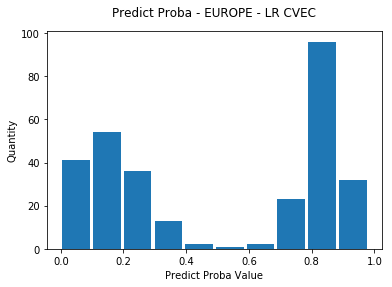

In [74]:
plt.hist(predict_lr_cvec_df['EUROPE'], rwidth = 0.9);

plt.title('Predict Proba - EUROPE - LR CVEC', pad = 15)
plt.xlabel('Predict Proba Value')
plt.ylabel('Quantity');

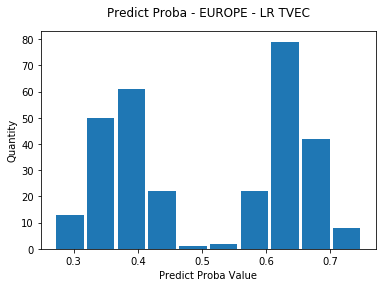

In [75]:
plt.hist(predict_lr_tvec_df['EUROPE'], rwidth = 0.9);

plt.title('Predict Proba - EUROPE - LR TVEC', pad = 15)
plt.xlabel('Predict Proba Value')
plt.ylabel('Quantity');

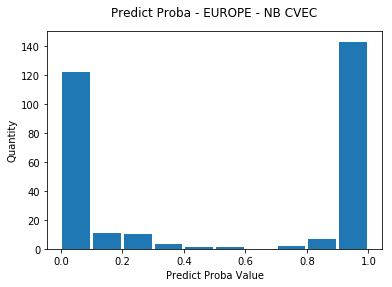

In [76]:
plt.hist(predict_mnb_cvec_df['EUROPE'], rwidth = 0.9);

plt.title('Predict Proba - EUROPE - NB CVEC', pad = 15)
plt.xlabel('Predict Proba Value')
plt.ylabel('Quantity');

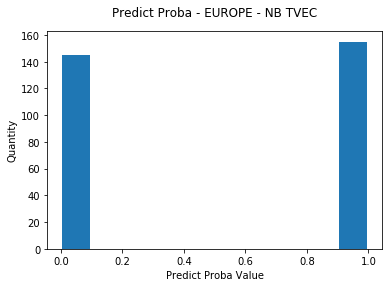

In [77]:
plt.hist(predict_gnb_tvec_df['EUROPE'], rwidth = 0.9);

plt.title('Predict Proba - EUROPE - NB TVEC', pad = 15)
plt.xlabel('Predict Proba Value')
plt.ylabel('Quantity');